### 1. Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Importing the datasets

In [2]:
sales_data    = pd.read_excel("ProductA.xlsx")
google_clicks = pd.read_excel("ProductA_google_clicks.xlsx")
impressions   = pd.read_excel("ProductA_fb_impressions.xlsx")

### 3. Merging datasets

In [3]:
data = pd.merge(sales_data, google_clicks, on="Day Index", how="left")
df   = pd.merge(data, impressions, on="Day Index", how="left")

In [4]:
df.head()

,Day Index,Quantity,Clicks,Impressions
0,2021-12-01,14,445,620
1,2021-12-02,10,433,890
2,2021-12-03,13,424,851
3,2021-12-04,22,427,881
4,2021-12-05,33,451,678


### 4. Descriptive Statistics

In [5]:
# Shape of the data in rows & columns

rows,columns = df.shape

print("Total number of rows : ",rows)
print("Total number of columns : ",columns)

Total number of rows :  212
Total number of columns :  4


In [6]:
# Basic info and structure
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 211
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Day Index    212 non-null    datetime64[ns]
 1   Quantity     212 non-null    int64         
 2   Clicks       212 non-null    int64         
 3   Impressions  212 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 8.3 KB


In [7]:
df.columns

Index(['Day Index', 'Quantity', 'Clicks', 'Impressions'], dtype='object')

In [8]:
# Data type of each column
df.dtypes

Day Index      datetime64[ns]
Quantity                int64
Clicks                  int64
Impressions             int64
dtype: object

In [9]:
# Basic statistics for numerical columns
df.describe()

,Quantity,Clicks,Impressions
count,212.000000,212.00000,212.000000
mean,17.542453,358.20283,1531.702830
std,5.790423,164.52160,440.660783
min,5.000000,60.00000,620.000000
25%,13.750000,154.00000,1209.750000
50%,17.000000,402.50000,1460.000000
75%,21.000000,492.75000,1862.000000
max,38.000000,726.00000,2707.000000


## EXPLORATORY DATA ANALYSIS

### 5. Handling missing values

In [10]:
# Check for missing values in the dataset
print(df.isnull().sum())

Day Index      0
Quantity       0
Clicks         0
Impressions    0
dtype: int64


=> There are no missing values in the dataset

### 6. Data visualisation

Text(0.5, 1.0, 'Day Index Vs Quantity')

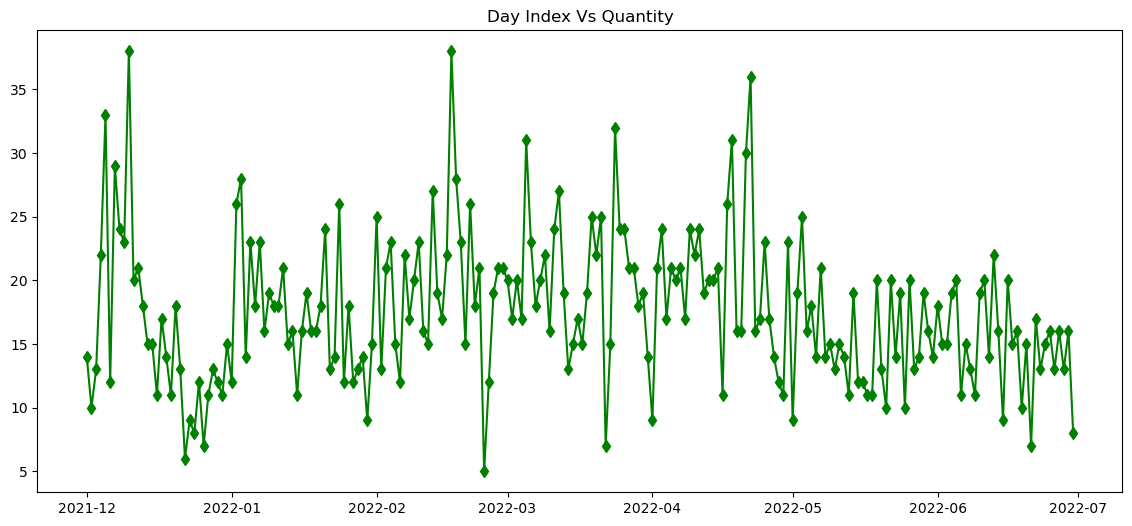

In [11]:
plt.figure(figsize=(14, 6))
plt.plot(df['Day Index'],df['Quantity'],marker='d',c='green')
plt.title("Day Index Vs Quantity")

    ➡️There are more sales in the months of December, March, May

Text(0.5, 1.0, 'Day Index Vs Impressions')

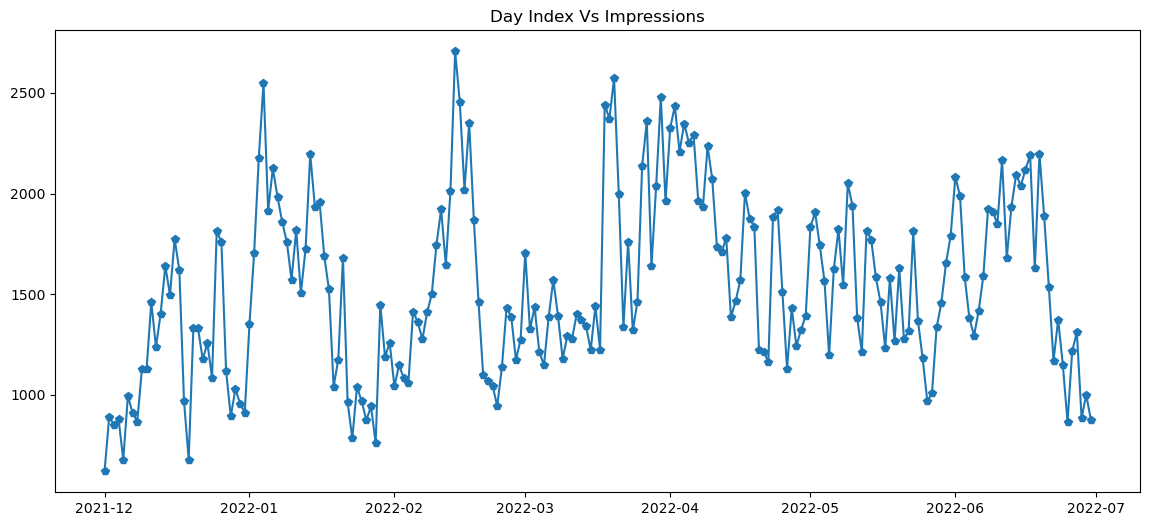

In [12]:
plt.figure(figsize=(14, 6))
plt.plot(df['Day Index'],df['Impressions'],marker='p')
plt.title("Day Index Vs Impressions")

    The graph shows daily fluctuations in impressions, with notable peaks around January and April 2022, indicating periodic increases in activity.

Text(0.5, 1.0, 'Day Index Vs Clicks')

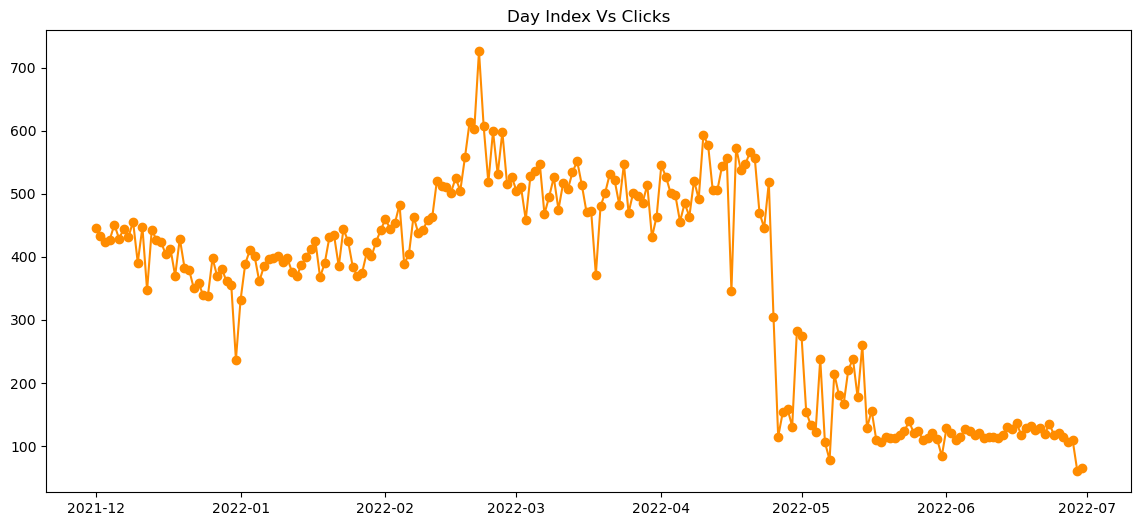

In [13]:
plt.figure(figsize=(14, 6))
plt.plot(df['Day Index'],df['Clicks'],marker='o',c='darkorange')
plt.title("Day Index Vs Clicks")

    The plot shows a steady increase in clicks until may-2022, followed by a sharp decline.

### 7.Detecting Outliers

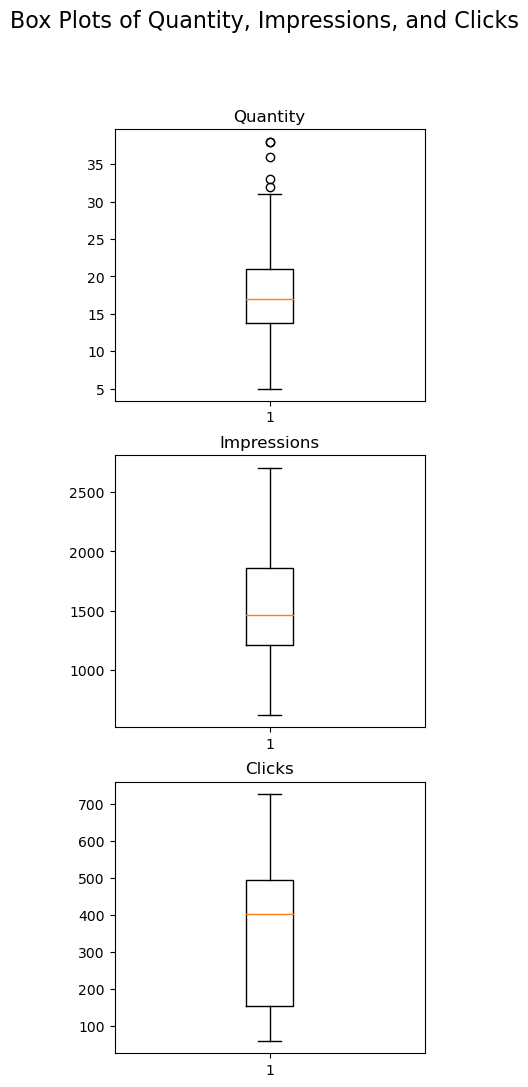

In [14]:
fig, ax = plt.subplots(3, 1, figsize=(4, 12))

ax[0].boxplot(df['Quantity'])
ax[0].set_title("Quantity")

ax[1].boxplot(df['Impressions'])
ax[1].set_title("Impressions")

ax[2].boxplot(df['Clicks'])
ax[2].set_title("Clicks")

fig.suptitle("Box Plots of Quantity, Impressions, and Clicks", fontsize=16)
plt.show()

     ➡️There are outliers in Quantity attribute

### 8.Handling Outliers

In [15]:
def count_outliers(df):
    outlier_counts = {}
    for i in df.select_dtypes(include=['float64', 'int64']):
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[i] < lower_bound) | (df[i] > upper_bound)]
        outlier_counts[i] = len(outliers)
    return outlier_counts


outliers = count_outliers(df)
print("Number of outliers in each column\n")
for i in outliers:
    print(i," : ",outliers[i])

Number of outliers in each column

Quantity  :  5
Clicks  :  0
Impressions  :  0


In [16]:
percentile=df['Quantity'].quantile(0.95)
print("95th percentile value : ",percentile)

95th percentile value :  27.44999999999999


In [17]:
def update_outliers(data):
    q1,q3=data.quantile([0.25,0.75])
    IQR=q3-q1
    lower,upper=q1-(1.5*IQR), q3+(1.5*IQR)
    return data.apply(lambda x: percentile if x<lower or x>upper else x)

In [18]:
prev_df=df
df['Quantity']=update_outliers(df['Quantity'])
print("Updated Dataset : ")
df

Updated Dataset : 


,Day Index,Quantity,Clicks,Impressions
0,2021-12-01,14.00,445,620
1,2021-12-02,10.00,433,890
2,2021-12-03,13.00,424,851
3,2021-12-04,22.00,427,881
4,2021-12-05,27.45,451,678
...,...,...,...,...
207,2022-06-26,13.00,114,1218
208,2022-06-27,16.00,106,1311
209,2022-06-28,13.00,109,885
210,2022-06-29,16.00,60,1000


{'whiskers': [<matplotlib.lines.Line2D at 0x21542df7b50>,
 'caps': [<matplotlib.lines.Line2D at 0x21542e04d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x21542df7210>],
 'medians': [<matplotlib.lines.Line2D at 0x21542e05f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x21542e06750>],
 'means': []}

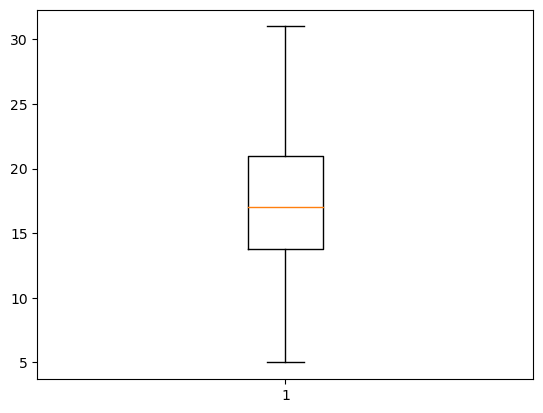

In [19]:
plt.boxplot(df['Quantity'])

    Therefore, Outliers are replaced by 95th percentile values.

# Feature Engineering

* Extracting year and month from Day Index

In [20]:
df['Year-Month'] = df['Day Index'].dt.to_period('M')

* Applying Log Transformation to Quantity, Clicks, and Impressions

In [21]:
df['Log_Quantity'] = np.log1p(df['Quantity'])
df['Log_Clicks'] = np.log1p(df['Clicks'])
df['Log_Impressions'] = np.log1p(df['Impressions'])
df.head()

,Day Index,Quantity,Clicks,Impressions,Year-Month,Log_Quantity,Log_Clicks,Log_Impressions
0,2021-12-01,14.00,445,620,2021-12,2.708050,6.100319,6.431331
1,2021-12-02,10.00,433,890,2021-12,2.397895,6.073045,6.792344
2,2021-12-03,13.00,424,851,2021-12,2.639057,6.052089,6.747587
3,2021-12-04,22.00,427,881,2021-12,3.135494,6.059123,6.782192
4,2021-12-05,27.45,451,678,2021-12,3.348148,6.113682,6.520621


* Extracting Month names and Month number

In [22]:
df['MonthName'] = df['Day Index'].dt.month_name()
df['MonthName'] = pd.Categorical(df['MonthName'], categories=['December', 'January', 'February', 'March', 'April', 'May', 'June'], ordered=True)
df['MonthNumber'] = df['Day Index'].dt.month
# df.head()

* Extracting day of the week and No.of week in Month

In [23]:
df['Day_of_week'] = df['Day Index'].dt.day_name()
df['Day_of_week'] = pd.Categorical(df['Day_of_week'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ordered=True)
df['Day_number'] = df['Day Index'].dt.weekday+1

def weekOfMonth(date):
    first_day = date.replace(day=1)
    date = date.day + first_day.weekday()
    return int(np.ceil(date/7.0))

df['Week_of_Month'] = df['Day Index'].apply(weekOfMonth)

* Checking whether a day is weekend or week day

In [24]:
df['Weekend'] = (df['Day Index'].dt.weekday > 4).astype(int)
# df['Week_day'] = (df['Day Index'].dt.weekday < 5).astype(int)

* Extracting months and adding to dataset

In [25]:
months=['December','January','February','March','April','May','June']
month_num=[12,1,2,3,4,5,6]
for i in range(len(months)):
    df[months[i]] = (df['MonthNumber'] == month_num[i]).astype(int)

df.head()

,Day Index,Quantity,Clicks,Impressions,Year-Month,Log_Quantity,Log_Clicks,Log_Impressions,MonthName,MonthNumber,...,Day_number,Week_of_Month,Weekend,December,January,February,March,April,May,June
0,2021-12-01,14.00,445,620,2021-12,2.708050,6.100319,6.431331,December,12,...,3,1,0,1,0,0,0,0,0,0
1,2021-12-02,10.00,433,890,2021-12,2.397895,6.073045,6.792344,December,12,...,4,1,0,1,0,0,0,0,0,0
2,2021-12-03,13.00,424,851,2021-12,2.639057,6.052089,6.747587,December,12,...,5,1,0,1,0,0,0,0,0,0
3,2021-12-04,22.00,427,881,2021-12,3.135494,6.059123,6.782192,December,12,...,6,1,1,1,0,0,0,0,0,0
4,2021-12-05,27.45,451,678,2021-12,3.348148,6.113682,6.520621,December,12,...,7,1,1,1,0,0,0,0,0,0


<br></br>
* Extracting days and adding to dataset

In [26]:
days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
for i in range(len(days)):
    df[days[i]] = (df['Day_number']-1 == i).astype(int)

df.head()

,Day Index,Quantity,Clicks,Impressions,Year-Month,Log_Quantity,Log_Clicks,Log_Impressions,MonthName,MonthNumber,...,April,May,June,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,2021-12-01,14.00,445,620,2021-12,2.708050,6.100319,6.431331,December,12,...,0,0,0,0,0,1,0,0,0,0
1,2021-12-02,10.00,433,890,2021-12,2.397895,6.073045,6.792344,December,12,...,0,0,0,0,0,0,1,0,0,0
2,2021-12-03,13.00,424,851,2021-12,2.639057,6.052089,6.747587,December,12,...,0,0,0,0,0,0,0,1,0,0
3,2021-12-04,22.00,427,881,2021-12,3.135494,6.059123,6.782192,December,12,...,0,0,0,0,0,0,0,0,1,0
4,2021-12-05,27.45,451,678,2021-12,3.348148,6.113682,6.520621,December,12,...,0,0,0,0,0,0,0,0,0,1


In [27]:
df.columns

Index(['Day Index', 'Quantity', 'Clicks', 'Impressions', 'Year-Month',
       'Log_Quantity', 'Log_Clicks', 'Log_Impressions', 'MonthName',
       'MonthNumber', 'Day_of_week', 'Day_number', 'Week_of_Month', 'Weekend',
       'December', 'January', 'February', 'March', 'April', 'May', 'June',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'],
      dtype='object')

### 9.Corelation between Features

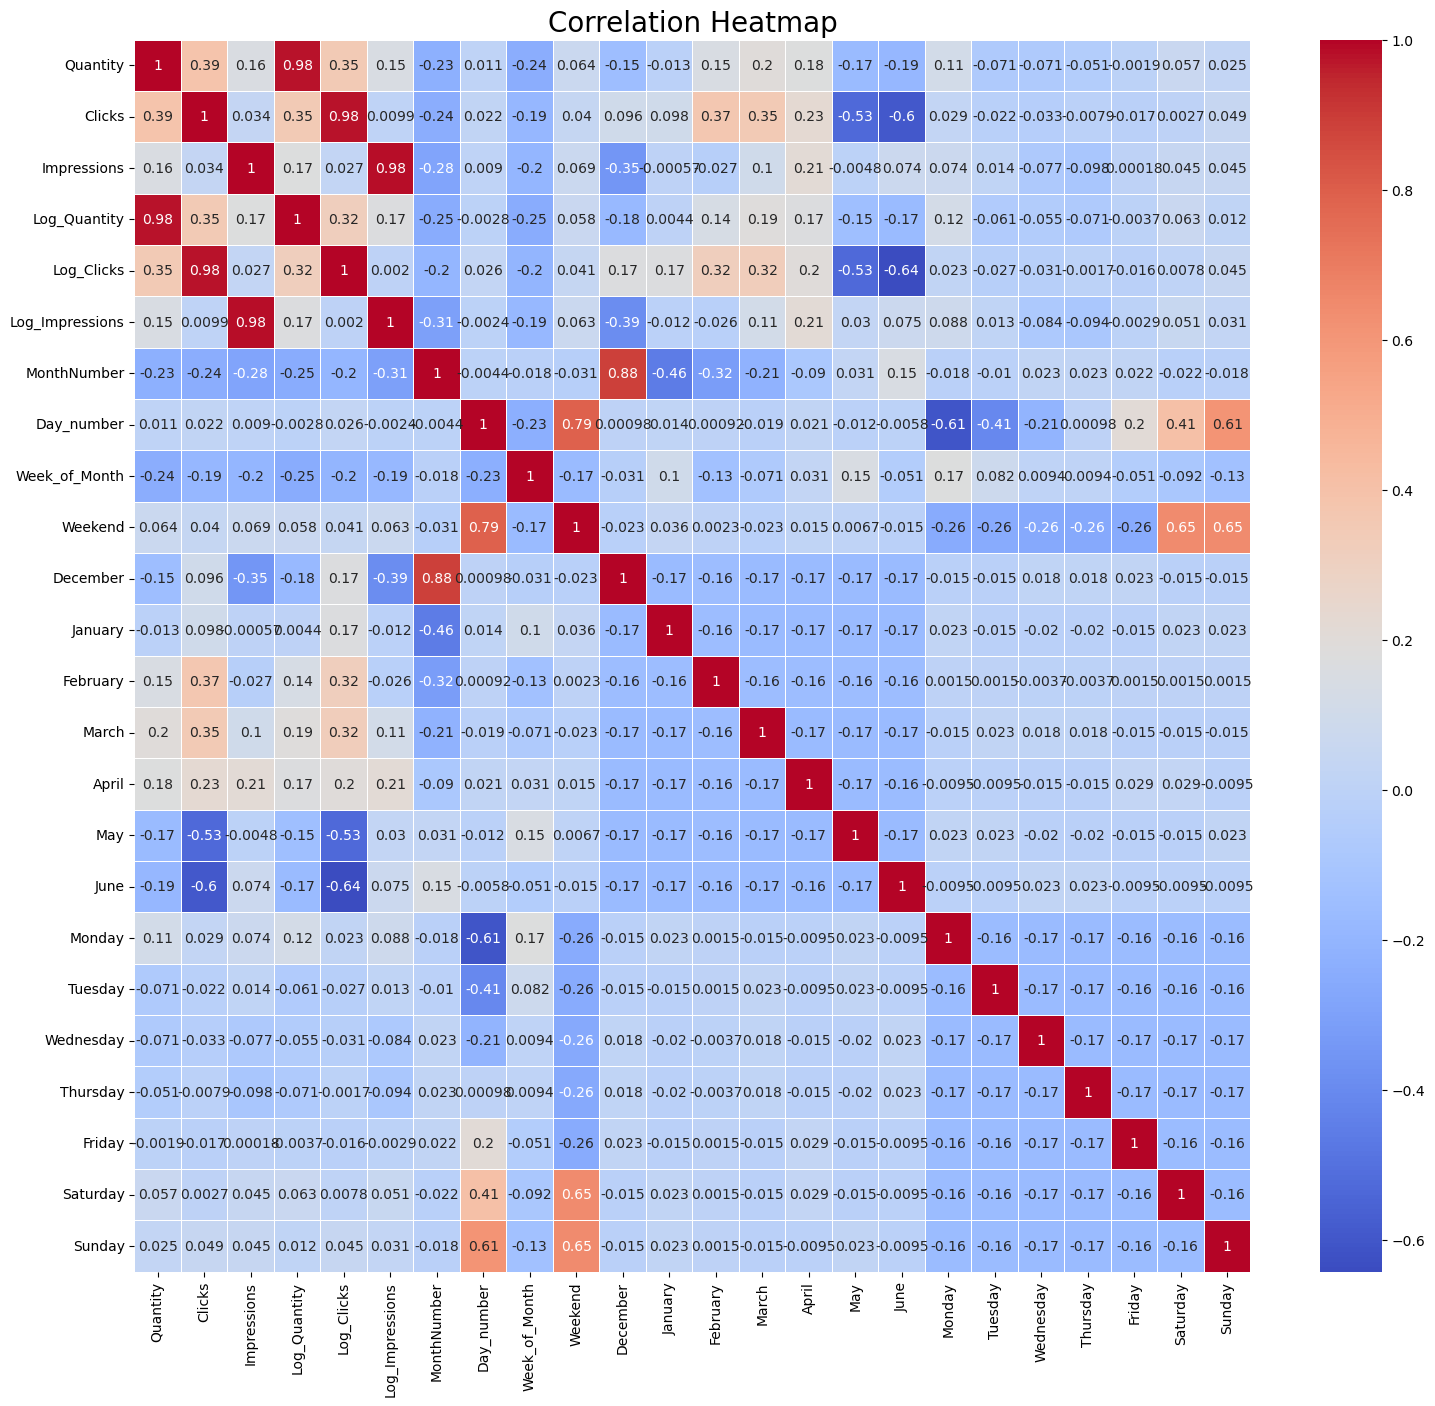

In [28]:
plt.figure(figsize=(18,16))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm",linewidths=0.5).set_title("Correlation Heatmap",fontsize=20)
plt.show()

    The heatmap shows a positive correlation between Quantity and Clicks, as well as between the log-transformed and original versions of these variables

### Day wise plot for all the months

#### i. For Quantity

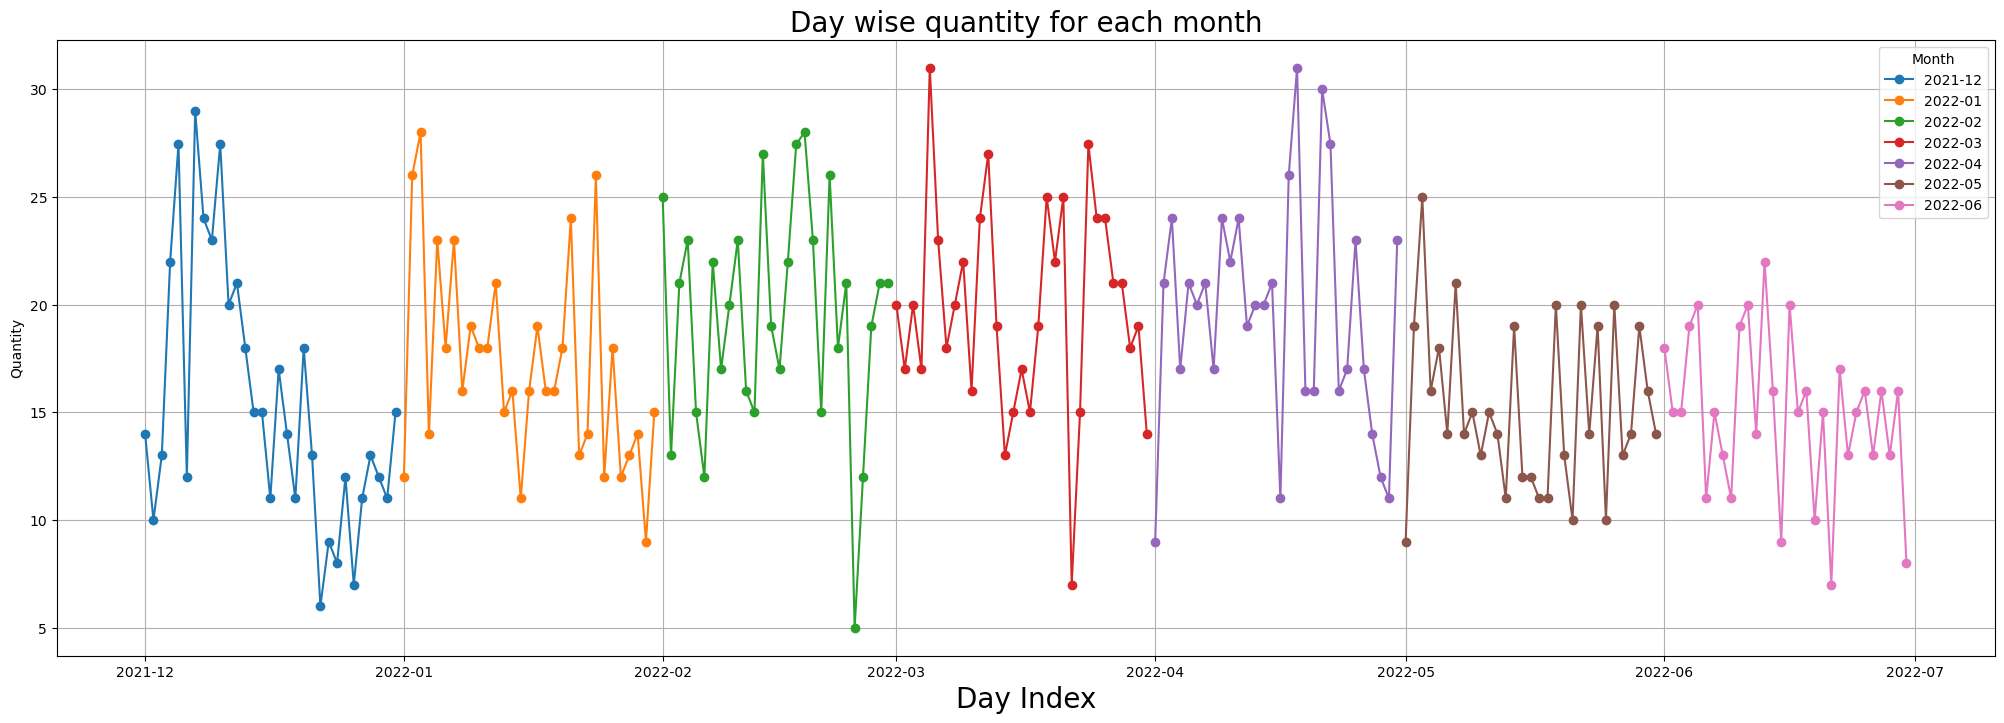

In [29]:
plt.figure(figsize=(25,8))
for month in df['Year-Month'].unique():
    monthly_data = df[df['Year-Month']==month]
    plt.plot(monthly_data['Day Index'],monthly_data['Quantity'],marker='o',label=str(month))
    
plt.title('Day wise quantity for each month',fontsize=20)
plt.xlabel('Day Index',fontsize=20)
plt.ylabel('Quantity')
plt.legend(title="Month",loc='best') 
plt.grid(True)
plt.show()  

    ➡️There are more sales in the months of December, March,April and May

#### ii. For Clicks

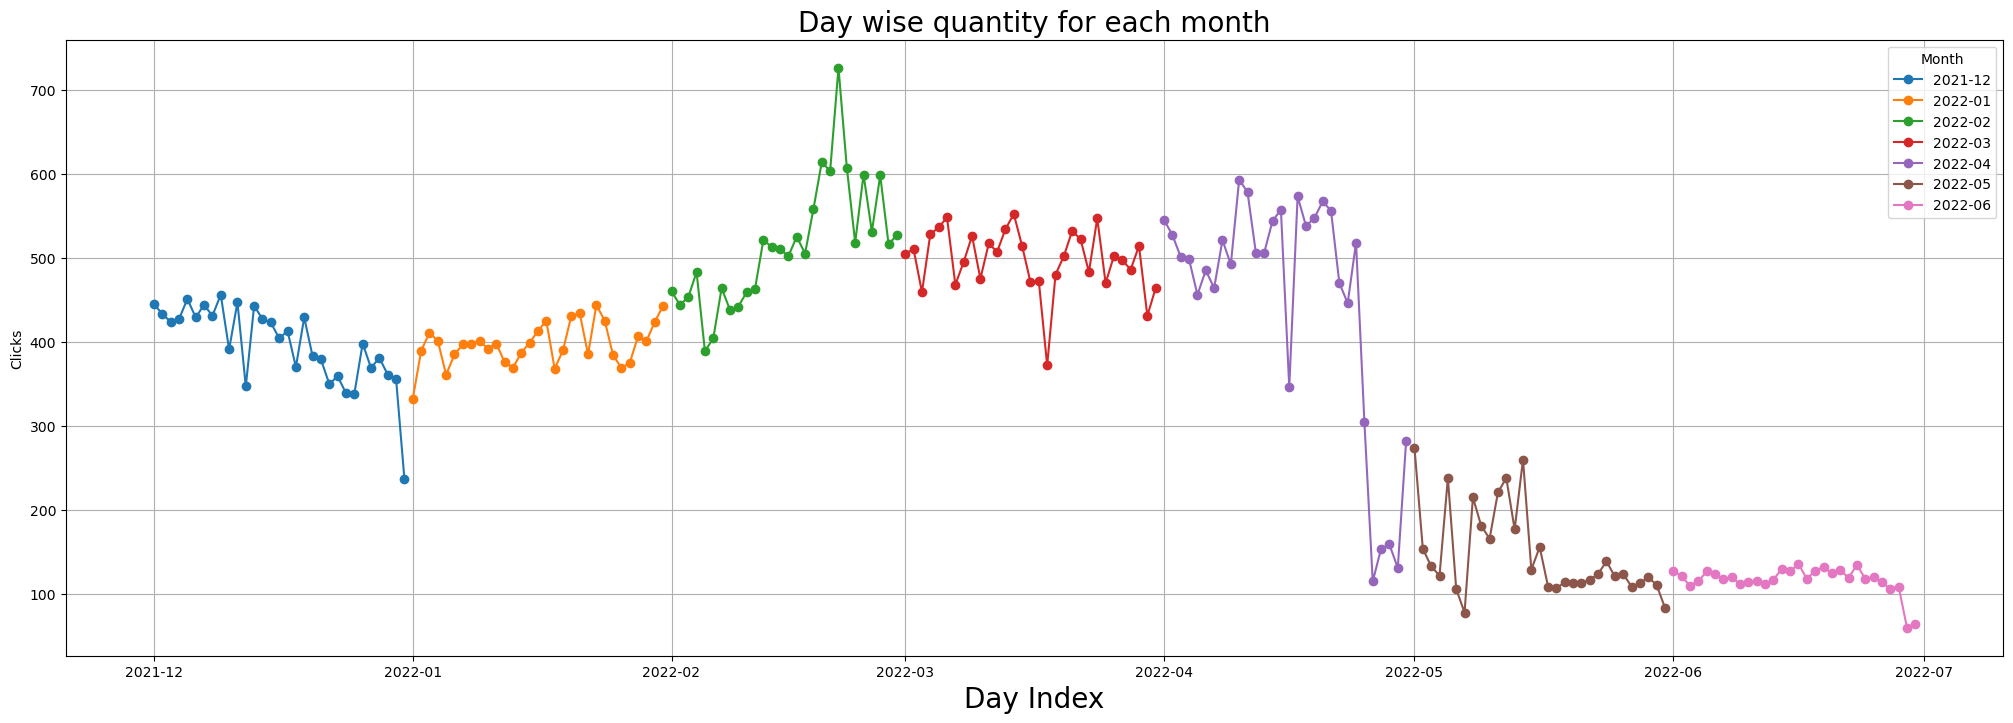

In [30]:
plt.figure(figsize=(25,8))
for month in df['Year-Month'].unique():
    monthly_data = df[df['Year-Month']==month]
    plt.plot(monthly_data['Day Index'],monthly_data['Clicks'],marker='o',label=str(month))
    
plt.title('Day wise quantity for each month',fontsize=20)
plt.xlabel('Day Index',fontsize=20)
plt.ylabel('Clicks')
plt.legend(title="Month",loc='best') 
plt.grid(True)
plt.show()

    ➡️There is steady increase in clicks until may-2022, followed by a sharp decline.

#### iii. For Impressions

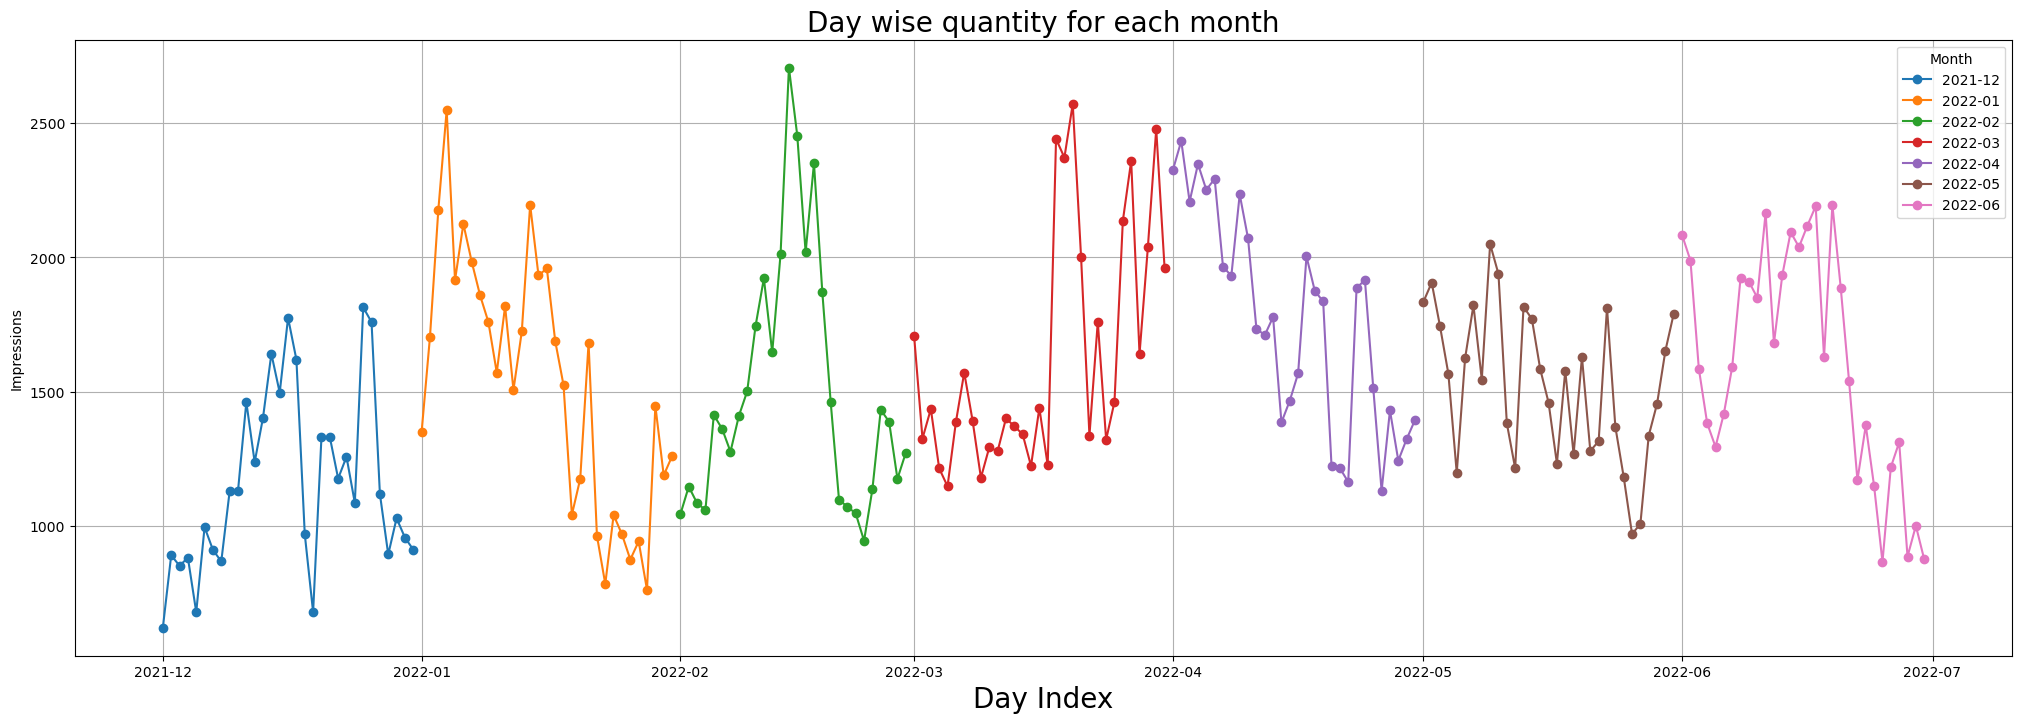

In [31]:
plt.figure(figsize=(25,8))
for month in df['Year-Month'].unique():
    monthly_data = df[df['Year-Month']==month]
    plt.plot(monthly_data['Day Index'],monthly_data['Impressions'],marker='o',label=str(month))
    
plt.title('Day wise quantity for each month',fontsize=20)
plt.xlabel('Day Index',fontsize=20)
plt.ylabel('Impressions')
plt.legend(title="Month",loc='best') 
plt.grid()
plt.show()  

    ➡️There are more peaks in the months of january and April. Highest impressions in February

### Analysing Monthly Data

In [40]:
monthly_data = df.groupby('Year-Month').agg(
    {col: 'sum' for col in ['Quantity', 'Log_Quantity', 'Clicks', 'Log_Clicks', 'Impressions', 'Log_Impressions']}
).reset_index()

monthly_data

,Year-Month,Quantity,Log_Quantity,Clicks,Log_Clicks,Impressions,Log_Impressions
0,2021-12,478.90,84.753302,12284,185.278091,35887,217.454485
1,2022-01,533.00,88.934504,12314,185.536001,47464,225.799953
2,2022-02,543.45,83.243766,14372,174.529919,42042,203.630018
3,2022-03,615.45,93.208322,15419,192.460779,50803,228.470118
4,2022-04,590.45,89.791932,13480,180.840352,52857,223.445682
5,2022-05,471.00,85.470146,4566,153.302000,47325,226.729954
6,2022-06,447.00,82.108175,3504,142.680335,48343,220.403471


#### i. For Quantity

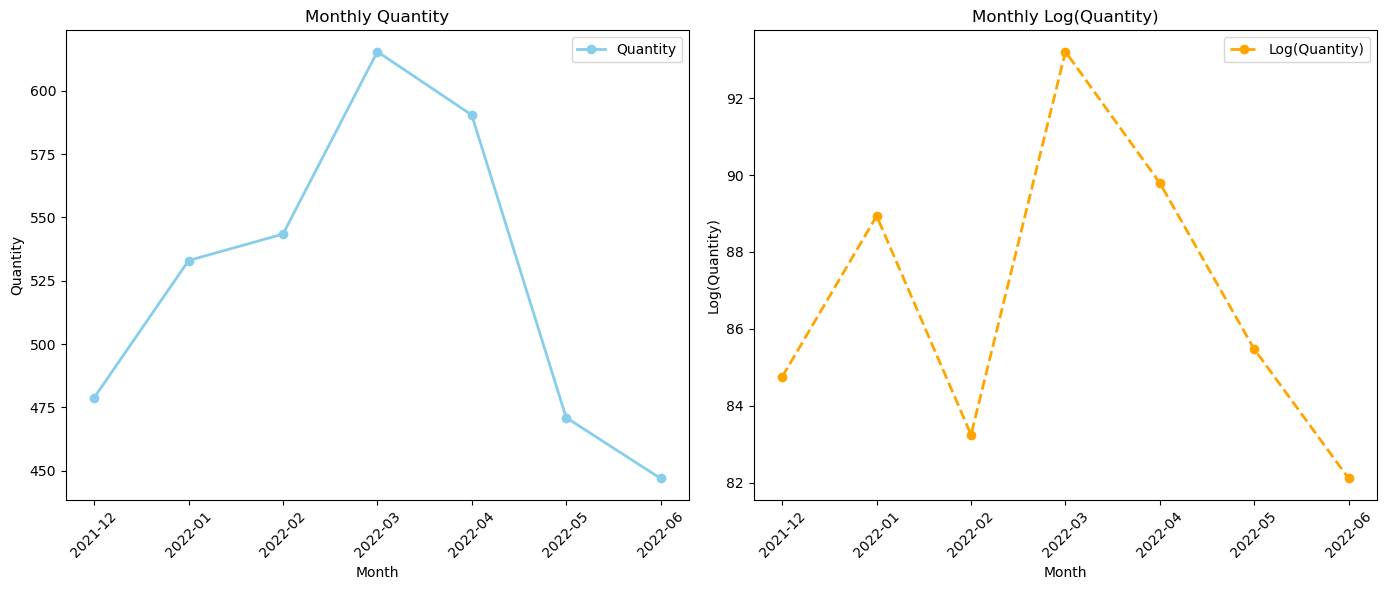

In [49]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(monthly_data['Year-Month'].dt.strftime('%Y-%m'), monthly_data['Quantity'], marker='o', color='skyblue', label='Quantity', linewidth=2)
plt.title('Monthly Quantity')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.tick_params(axis='x', rotation=45)
plt.legend()

plt.subplot(1, 2, 2) 
plt.plot(monthly_data['Year-Month'].dt.strftime('%Y-%m'), monthly_data['Log_Quantity'], marker='o', color='orange', label='Log(Quantity)', linestyle='--', linewidth=2)
plt.title('Monthly Log(Quantity)')
plt.xlabel('Month')
plt.ylabel('Log(Quantity)')
plt.tick_params(axis='x', rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

    ➡️More number of sales happened in the months of March and April.
    ➡️Sales of product A increased from December to January and maximum sales in March and then declines

#### ii. For Clicks

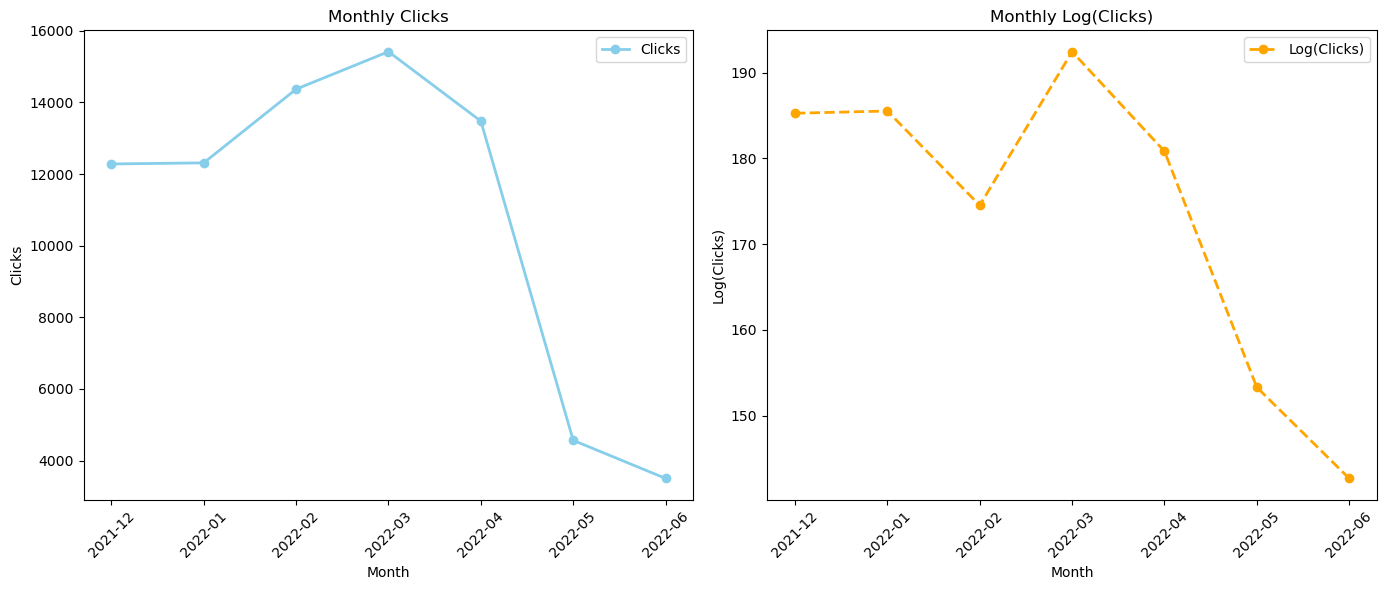

In [51]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(monthly_data['Year-Month'].dt.strftime('%Y-%m'), monthly_data['Clicks'], marker='o', color='skyblue', label='Clicks', linewidth=2)
plt.title('Monthly Clicks')
plt.xlabel('Month')
plt.ylabel('Clicks')
plt.tick_params(axis='x', rotation=45)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(monthly_data['Year-Month'].dt.strftime('%Y-%m'), monthly_data['Log_Clicks'], marker='o', color='orange', label='Log(Clicks)', linestyle='--', linewidth=2)
plt.title('Monthly Log(Clicks)')
plt.xlabel('Month')
plt.ylabel('Log(Clicks)')
plt.tick_params(axis='x', rotation=45)
plt.legend()

plt.tight_layout()

plt.show()

    ➡️Highest number of Clicks denoted in the month of March. February and April also has more number of Clicks
    i.e mostly during Summer months
    ➡️There is a decline from March

#### iii. For Impressions

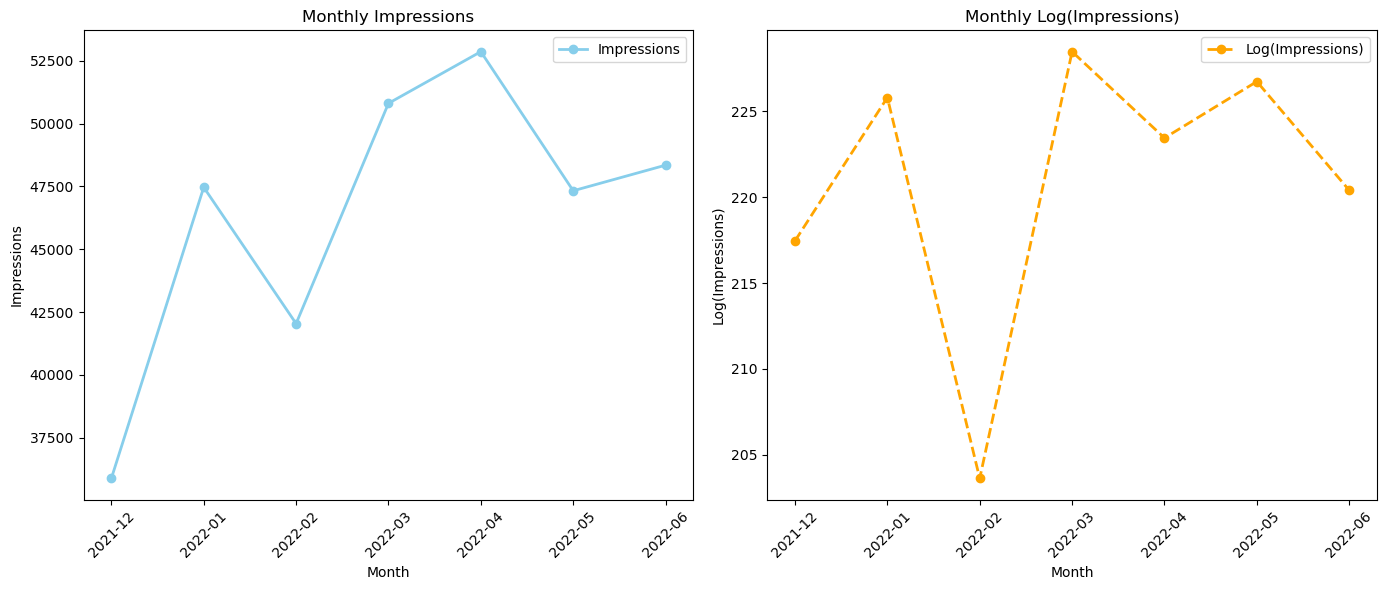

In [52]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(monthly_data['Year-Month'].dt.strftime('%Y-%m'), monthly_data['Impressions'], marker='o', color='skyblue', label='Impressions', linewidth=2)
plt.title('Monthly Impressions')
plt.xlabel('Month')
plt.ylabel('Impressions')
plt.tick_params(axis='x', rotation=45)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(monthly_data['Year-Month'].dt.strftime('%Y-%m'), monthly_data['Log_Impressions'], marker='o', color='orange', label='Log(Impressions)', linestyle='--', linewidth=2)
plt.title('Monthly Log(Impressions)')
plt.xlabel('Month')
plt.ylabel('Log(Impressions)')
plt.tick_params(axis='x', rotation=45)
plt.legend()

plt.tight_layout()

plt.show()